In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sys

sys.path.append("..")

from opdynamics.utils.reading_tools import (parse_experiment_params,
                                            make_tuple,
                                            count_params_runs)
from opdynamics.utils.results_tools import get_experiment_mean_data
from opdynamics.utils.plotting.formatting import (classical_structure,
                                                  format_text)

In [72]:
param_run_count = {}

params = parse_experiment_params("../experiments_params/case_2.json")
results_path = "../results/case_2/"

for param in params:
    param_run_count[make_tuple(param)] = count_params_runs(param, results_path)
    
params = parse_experiment_params("../experiments_params/case_3.json")
results_path = "../results/case_3/"

for param in params:
    param_run_count[make_tuple(param)] = count_params_runs(param, results_path)
    
params = parse_experiment_params("../experiments_params/case_7.json")
results_path = "../results/case_7/"

for param in params:
    param_run_count[make_tuple(param)] = count_params_runs(param, results_path)

In [73]:
N = len(param_run_count)
x = len([k for k in param_run_count.values() if k < 100])

print(x/N)

0.9484126984126984


In [116]:
from opdynamics.utils.plotting.formatting import format_text, hist_classical_structure, get_ax_grid, violin_classical_structure

/home/roboto/Documents/Github/EntropiaGrafos/notebooks/../opdynamics/utils/plotting/formatting.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(x) for x in ax.get_xticks()], rotation = 45)


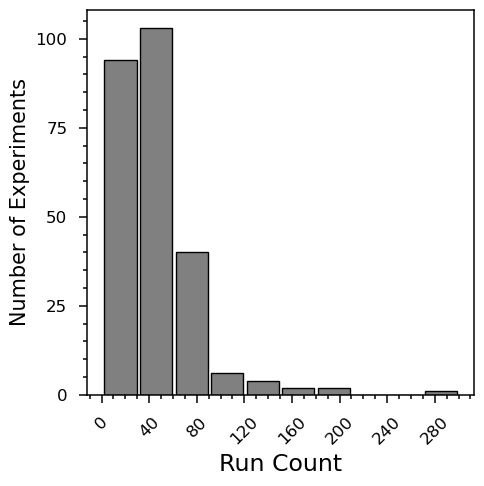

In [170]:
fig, axs = get_ax_grid()

axs.hist(
    param_run_count.values(),
    bins = 10,
    align = 'mid',
    color = 'grey',
    edgecolor = 'k',
    rwidth = 0.9
)

fig, axs = format_text(
    fig,
    axs,
    [],
    title_size = 15,
    single_ylabel = True,
    position_ylabel = "left",
    ylabel = "Number of Experiments",
    ylabel_fontsize = 15,
    xlabel_bottom_only = True,
    xlabel = "Run Count",
    xlabel_fontsize = 17
)

fig, axs = hist_classical_structure(fig, axs)

In [103]:
params = parse_experiment_params("../experiments_params/case_2.json") +\
    parse_experiment_params("../experiments_params/case_3.json") +\
    parse_experiment_params("../experiments_params/case_7.json")

In [106]:
params_kappa_0 = [x for x in params if x['kappa'] == 0]
counts_kappa_0 = [param_run_count[make_tuple(x)] for x in params_kappa_0]

params_kappa_15 = [x for x in params if x['kappa'] == 15]
counts_kappa_15 = [param_run_count[make_tuple(x)] for x in params_kappa_15]

params_kappa_25 = [x for x in params if x['kappa'] == 25]
counts_kappa_25 = [param_run_count[make_tuple(x)] for x in params_kappa_25]

params_kappa_30 = [x for x in params if x['kappa'] == 30]
counts_kappa_30 = [param_run_count[make_tuple(x)] for x in params_kappa_30]

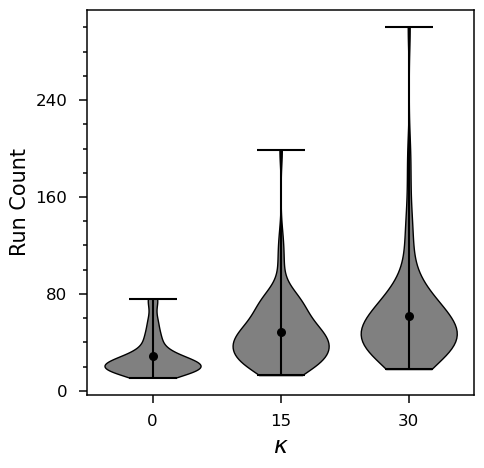

In [169]:
fig, axs = get_ax_grid()

data = [
    counts_kappa_0,
    counts_kappa_15,
    counts_kappa_30
]

parts = axs.violinplot(
    data,
    positions = [1, 2, 3],
    widths = 0.75,
    showmeans = False,
    showmedians = False,
    # showextrema = False
)

for pc in parts['bodies']:
    pc.set_facecolor('grey')
    pc.set_edgecolor('k')
    pc.set_alpha(1)
    
parts['cbars'].set_color('k')
parts['cmaxes'].set_color('k')
parts['cmins'].set_color('k')
    
means = []
for d in data:
    means.append(np.mean(d))
means = np.array(means)

inds = np.arange(1, len(means) + 1)
axs.scatter(inds, means, marker='o', color='k', s=30, zorder=3)

fig, axs = format_text(
    fig,
    axs,
    [],
    title_size = 15,
    single_ylabel = True,
    position_ylabel = "left",
    ylabel = "Run Count",
    ylabel_fontsize = 15,
    xlabel_bottom_only = True,
    xlabel = r"$\kappa$",
    xlabel_fontsize = 17
)

fig, axs = violin_classical_structure(fig, axs, x_ticks = [1, 2, 3], x_tick_labels = [0, 15, 30])

In [173]:
params = parse_experiment_params("../experiments_params/case_2.json")\
    + parse_experiment_params("../experiments_params/case_3.json")\
    #+ parse_experiment_params("../experiments_params/case_7.json")

params_gamma_0 = [x for x in params if x['gamma'] == 0]
counts_gamma_0 = [param_run_count[make_tuple(x)] for x in params_gamma_0]

params_gamma_1 = [x for x in params if x['gamma'] == 1]
counts_gamma_1 = [param_run_count[make_tuple(x)] for x in params_gamma_1]

params_gamma_m1 = [x for x in params if x['gamma'] == -1]
counts_gamma_m1 = [param_run_count[make_tuple(x)] for x in params_gamma_m1]

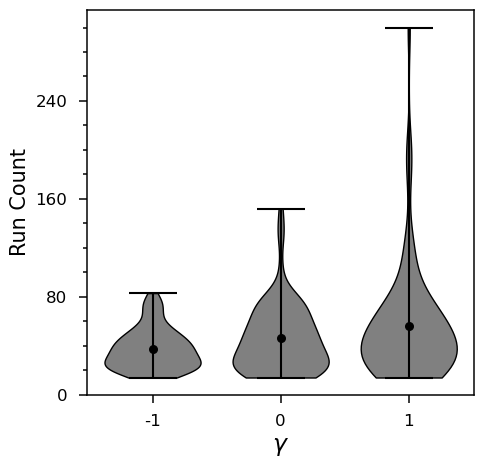

In [174]:
fig, axs = get_ax_grid()

data = [
    counts_gamma_m1,
    counts_gamma_0,
    counts_gamma_1
]

parts = axs.violinplot(
    data,
    positions = [1, 2, 3],
    widths = 0.75,
    showmeans = False,
    showmedians = False,
    # showextrema = False
)

for pc in parts['bodies']:
    pc.set_facecolor('grey')
    pc.set_edgecolor('k')
    pc.set_alpha(1)
    
parts['cbars'].set_color('k')
parts['cmaxes'].set_color('k')
parts['cmins'].set_color('k')
    
means = []
for d in data:
    means.append(np.mean(d))
means = np.array(means)

inds = np.arange(1, len(means) + 1)
axs.scatter(inds, means, marker='o', color='k', s=30, zorder=3)

fig, axs = format_text(
    fig,
    axs,
    [],
    title_size = 15,
    single_ylabel = True,
    position_ylabel = "left",
    ylabel = "Run Count",
    ylabel_fontsize = 15,
    xlabel_bottom_only = True,
    xlabel = r"$\gamma$",
    xlabel_fontsize = 17
)

fig, axs = violin_classical_structure(fig, axs, x_ticks = [1, 2, 3], x_tick_labels = [-1, 0, 1])